In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wrangle import get_zillow, remove_outliers, hist_plot

In [3]:
df = get_zillow()

In [4]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


Changed function to rename and drop as well, so the following is nothing.

In [97]:
# Why is Unnamed: 0 always a column after this....
# df = df.drop(columns="Unnamed: 0")
# df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [98]:
df.shape

(2985217, 7)

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2982272.0,3.093362,1.271569,0.00,2.00,3.00,4.0,2.500000e+01
bathroomcnt,2982260.0,2.216196,1.078250,0.00,2.00,2.00,3.0,3.200000e+01
calculatedfinishedsquarefeet,2940120.0,1831.455292,1954.198051,1.00,1215.00,1574.00,2140.0,9.525760e+05
taxvaluedollarcnt,2950951.0,443527.931066,816336.627054,1.00,188220.00,321161.00,514072.0,3.196225e+08
yearbuilt,2937384.0,1964.437713,23.644275,1801.00,1950.00,1963.00,1981.0,2.016000e+03
taxamount,2962465.0,5408.948842,9675.566706,0.24,2468.62,4007.62,6230.5,3.823176e+06
fips,2982285.0,6048.053490,20.240825,6037.00,6037.00,6037.00,6059.0,6.111000e+03


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 159.4 MB


In [101]:
# This data is very disqusting. Why is bedroom a float... what is 0.5 of a bedroom? Harry Potter Under the Stairs?
# Same with Year Built, why is it a float? It's either one year or another, I'm not looking for the month, what would December even be 1985.92 ??

In [102]:
df.isnull().sum()

bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

In [103]:
df.isnull().any()

bedroomcnt                      True
bathroomcnt                     True
calculatedfinishedsquarefeet    True
taxvaluedollarcnt               True
yearbuilt                       True
taxamount                       True
fips                            True
dtype: bool

In [104]:
df.shape

(2985217, 7)

In [105]:
# There is almost 3 million entries. I'm willing to miss a few.
df.dropna().info()
# This will drop 83,299 entries, how much of my data would I actually drop?
83299/2985217
# Just under 3% that might be more than I'm willing. I'll test out different cleaning methods.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901918 entries, 2 to 2982283
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 177.1 MB


0.02790383412663133

In [106]:
df.isnull().sum()

bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

In [107]:
# # I'm going to fill in the least missing, so bedroomcnt and bathroomcnt, 
# # I don't know what fips is, so I'm not going to mess with it incase it scews the data somehow.
# df.fips.nunique(), df.fips.unique()
# # Yeah, fips is something very specific so I'm not messing with that.

In [108]:
# df.bedroomcnt.mean(), df.bedroomcnt.mode(), df.bedroomcnt.median()

In [109]:
# # Using median because they're similar, I'd have to round the mean anyways to get a whole number for turning into an int.

# df.bedroomcnt = df.bedroomcnt.replace(np.nan, df.bedroomcnt.median())
# df.bedroomcnt.isnull().sum()

In [110]:
# df.bathroomcnt.mean(), df.bathroomcnt.mode(), df.bathroomcnt.median()

In [111]:
# # Just checking they are doing half bath even though it will still round to 2.
# df.bathroomcnt.unique()

In [112]:
# # Mean and mode round the same, so I'm just using mode for no rounding.
# df.bathroomcnt = df.bathroomcnt.replace(np.nan, df.bathroomcnt.median())
# df.bathroomcnt.isnull().sum()

In [113]:
df = df.rename(columns = {'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'calculatedfinishedsquarefeet':'area', 'taxvaluedollarcnt':'tax_value', 'yearbuilt':'year_built', 'taxamount':'tax_amount'})
# yas, renaming columns, I always forget I can customise the Database columns however I want to and make new ones with calculations too.
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


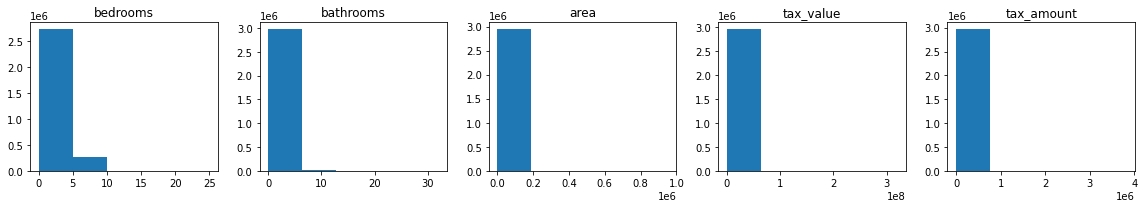

In [114]:
hist_plot(df)

In [115]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'tax_amount'])


In [116]:
df.head()
# Looked it up, FIPS are how the government denotes county of property.

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
10,4.0,4.0,3095.0,192544.0,2016.0,2460.72,6037.0
30,2.0,2.0,1090.0,357568.0,2004.0,6165.36,6037.0
33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
45,4.0,2.0,1931.0,224617.0,1957.0,2885.93,6037.0
46,0.0,1.0,700.0,387288.0,2008.0,4920.64,6037.0


In [117]:
df.fips.unique()
# 06037 is Los Angeles County, CA. 06059 is Orange County, CA. 06111 is Ventura County, CA.
# All of these area are around L.A. Orange actually contains my hometown, prices are going to be interesting here.

array([6037., 6059., 6111.])

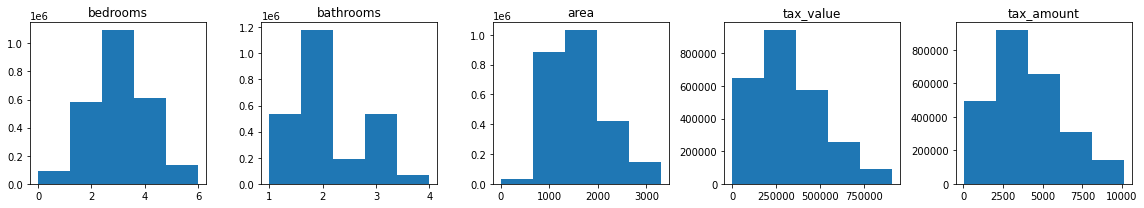

In [118]:
hist_plot(df)

In [119]:
df.isnull().sum()

bedrooms         0
bathrooms        0
area             0
tax_value        0
year_built    2222
tax_amount       0
fips             0
dtype: int64

In [120]:
df.year_built.mean(), df.year_built.median(), df.year_built.mode()

(1963.1547963454068,
 1962.0,
 0    1955.0
 Name: year_built, dtype: float64)

In [130]:
df.dropna().info(), df.info()
df = df.dropna()
# Year Built has a large range I'm not sure I want to mess with.
# With more time a function/model to guess year built could be implimented 
# to get a better approximation, but with 2.5 mil data points, 
# I think dropping 2,222 is fine.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513987 entries, 10 to 2982283
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 153.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516209 entries, 10 to 2982283
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 153.6 MB


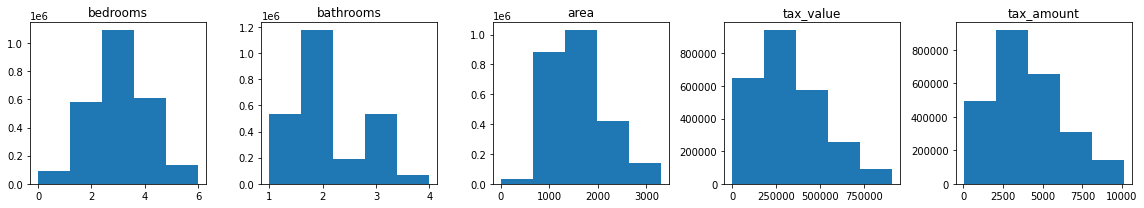

In [131]:
hist_plot(df)

-----

In [122]:
# bedroomcnt needs to be a whole number, half bath is a thing, half bed isn't.
# I'll throw in year built since it can't be a float either.
# Looking at calc sqft and taxs in dollars, they should be whole numbers too since they're already rounded before entry.

In [123]:
# df.bedroomcnt.astype(int)
# df.calculatedfinishedsquarefeet.astype(int)
# df.taxvaluedollarcnt.astype(int)
# df.yearbuilt.astype(int)

In [134]:
# Teacher had all stay float except FIP and Year which went to string. Apparently, same scale maybe?
df.year_built = df.year_built.astype(str)
df.fips =  df.fips.astype(str)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513987 entries, 10 to 2982283
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  object 
 5   tax_amount  float64
 6   fips        object 
dtypes: float64(5), object(2)
memory usage: 153.4+ MB


In [136]:
# I don't want to have to reclean it for each lesson after.
df.to_csv("zillow_after_wrangle.csv")
